<a href="https://colab.research.google.com/github/BLayus/Scrapping/blob/main/Scrapping_Aluguel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from bs4 import BeautifulSoup
from selenium import webdriver

import time
from tqdm.notebook import tqdm

import pandas as pd
import requests

### Funções


In [ ]:
def driversetup():
    options = webdriver.ChromeOptions()
    #run Selenium in headless mode
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    #overcome limited resource problems
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument("lang=en")
    #open Browser in maximized mode
    options.add_argument("start-maximized")
    #disable infobars
    options.add_argument("disable-infobars")
    #disable extension
    options.add_argument("--disable-extensions")
    options.add_argument("--incognito")
    options.add_argument("--disable-blink-features=AutomationControlled")
    
    driver = webdriver.Chrome(options=options)

    driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined});")

    return driver

In [ ]:
def pagesource(url, driver):
    driver = driver
    driver.get(url)
    soup = BeautifulSoup(driver.page_source)
    driver.close()
    return soup

###Capturando Site

In [ ]:
# Construindo uma lista de infos que serão retiradas do site

list_titulo= list()
list_endereco= list()
list_area= list()
list_quartos = list()
list_banheiros = list()
list_garagem = list()
list_preco = list()
list_condominio = list()
list_amenidades = list()

In [ ]:
pbar = tqdm(range(1,4))
for pagina in pbar:

  url = f'https://www.vivareal.com.br/aluguel/rj/rio-de-janeiro/zona-sul/jardim-botanico/apartamento_residencial/?pagina={pagina}'

  #TQDM com a informação de progresso
  pbar.set_description("Processando página %s" % pagina)

  #Faz requisição e resposta à página
  response = requests.get(url).content

  #Armazena e parseia em soup
  soup = BeautifulSoup(response, 'html.parser')

  #Acessa os anuncios atraves do nome da Classe html
  resultados = soup.find_all('div', class_= 'property-card__content')

  pbar2 = tqdm(resultados)
  for r in pbar2:
    title= r.find('span', class_= 'property-card__title')
    address= r.find('span', class_= 'property-card__address-container')
    area= r.find('span', class_= 'property-card__detail-area')
    quartos= r.find('li', class_= 'property-card__detail-room')
    banhos= r.find('li', class_= 'property-card__detail-bathroom')
    garagem= r.find('li', class_= 'property-card__detail-garage')
    preço= r.find('div', class_= 'property-card__price')
    condo= r.find('div', class_= 'property-card__price-details--condo')
    
    list_titulo.append(title.text)
    list_endereco.append(address.text)
    list_area.append(area.text)
    list_quartos.append(quartos.text)
    list_banheiros.append(banhos.text)
    list_garagem.append(garagem.text)
    list_preco.append(preço.text)
    list_condominio.append(condo.text)




  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

In [ ]:
for r in resultados:
  print(r.text, '/n')

    Apartamento com 3 Quartos para Aluguel, 100m²    Avenida Lineu de Paula Machado, 826 - Jardim Botânico, Rio de Janeiro - RJ  ver mapa       100   m²     3   Quartos     2   Banheiros     1   Vaga     Aceita animais Ar-condicionado Salão de festas Portaria 24h       R$ 3.900 /Mês     Condomínio:   R$ 1.424       /n
    Apartamento com 2 Quartos para Aluguel, 75m²    Rua Faro, 51 - Jardim Botânico, Rio de Janeiro - RJ  ver mapa       75   m²     2   Quartos     3   Banheiros     1   Vaga     Elevador Condomínio fechado Aceita animais Ar-condicionado Portaria 24h ...       R$ 4.000 /Mês     Condomínio:   R$ 1.188       /n
    Apartamento com 3 Quartos para Aluguel, 93m²    Rua Peri - Jardim Botânico, Rio de Janeiro - RJ  ver mapa       93   m²     3   Quartos     2   Banheiros     1   Vaga     Elevador Portão eletrônico Aceita animais       R$ 4.500 /Mês     Condomínio:   R$ 1.216       /n
    Apartamento com 2 Quartos para Aluguel, 79m²    Rua Pio Correia, 92 - Jardim Botânico, Rio d

### Tratamento das listas

In [ ]:
list_titulo = [l.replace ('  ', '') for l in list_titulo]

In [ ]:
list_titulo

['Apartamento com 3 Quartos para Aluguel, 100m²',
 'Apartamento com 2 Quartos para Aluguel, 75m²',
 'Apartamento com 3 Quartos para Aluguel, 93m²',
 'Apartamento com 2 Quartos para Aluguel, 79m²',
 'Apartamento com 3 Quartos para Aluguel, 78m²',
 'Apartamento com 3 Quartos para Aluguel, 100m²',
 'Apartamento com 3 Quartos para Aluguel, 78m²',
 'Apartamento com 3 Quartos para Aluguel, 73m²',
 'Apartamento com 3 Quartos para Aluguel, 91m²',
 'Apartamento com 3 Quartos para Aluguel, 98m²',
 'Apartamento com 2 Quartos para Venda/Aluguel 58m²',
 'Apartamento com 3 Quartos à Venda/Aluguel 109m²',
 'Apartamento com 4 Quartos para Aluguel, 280m²',
 'Apartamento com 2 Quartos para Aluguel, 90m²',
 'Apartamento com 3 Quartos para Aluguel, 325m²',
 'Apartamento com 3 Quartos para Aluguel, 118m²',
 'Apartamento com 2 Quartos para Venda/Aluguel 63m²',
 'Apartamento comQuarto para Aluguel, 64m²',
 'Apartamento comQuarto para Aluguel, 48m²',
 'Apartamento com 3 Quartos para Venda/Aluguel 111m²',
 'Ap

In [ ]:
list_endereco = [l.split('-')[0] for l in list_endereco]

In [ ]:
list_endereco

[' Avenida Lineu de Paula Machado, 826 ',
 ' Rua Faro, 51 ',
 ' Rua Peri ',
 ' Rua Pio Correia, 92 ',
 ' Rua Von Martius ',
 ' Rua Abade Ramos ',
 ' Rua Pio Correia ',
 ' Rua Jardim Botânico ',
 ' Avenida Lineu de Paula Machado ',
 ' Rua Conde Afonso Celso, 89 ',
 ' Jardim Botânico, Rio de Janeiro ',
 ' Rua Benjamim Batista ',
 ' Rua Nascimento Bittencourt ',
 ' Rua Jardim Botânico, 227 ',
 ' Rua Benjamim Batista ',
 ' Rua Jardim Botânico ',
 ' Rua Jardim Botânico ',
 ' Rua Jardim Botânico, 667 ',
 ' Jardim Botânico, Rio de Janeiro ',
 ' Rua Benjamim Batista ',
 ' Rua Benjamim Batista ',
 ' Avenida Lineu de Paula Machado ',
 ' Rua Ingles de Sousa, 193 ',
 ' Rua Senador Simonsen, 12 ',
 ' Rua Corcovado ',
 ' Rua Lópes Quintas, 74 ',
 ' Rua Jardim Botânico ',
 ' Rua Visconde da Graça, 96 ',
 ' Jardim Botânico, Rio de Janeiro ',
 ' Rua Faro ',
 ' Avenida Lineu de Paula Machado, 1000 ',
 ' Jardim Botânico, Rio de Janeiro ',
 ' Rua Lópes Quintas ',
 ' Rua Jardim Botânico, 728 ',
 ' Rua Visc

In [ ]:
list_area = [l.replace (' ', '') for l in list_area]

In [ ]:
list_area = [float(l) for l in list_area]

In [ ]:
list_quartos = [l.replace ('  ', '') for l in list_quartos]

In [ ]:
list_quartos = [int(l.split("Q")[0]) for l in list_quartos]

In [ ]:
list_quartos

[3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 4,
 2,
 3,
 3,
 2,
 1,
 1,
 3,
 3,
 3,
 3,
 2,
 4,
 2,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 4,
 2,
 3,
 3,
 2,
 1,
 1,
 3,
 3,
 3,
 3,
 2,
 4,
 3,
 2,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 2,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 4,
 2,
 3,
 3,
 2,
 1,
 1,
 3,
 3,
 3,
 3,
 2,
 4,
 2,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 2,
 3,
 3]

In [ ]:
list_banheiros = [l.replace ('  ', '') for l in list_banheiros]

In [ ]:
list_banheiros = [int(l.split(" ")[0]) for l in list_banheiros]

In [ ]:
list_banheiros

[2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 1,
 2,
 4,
 2,
 3,
 2,
 3,
 1,
 1,
 2,
 3,
 3,
 3,
 2,
 5,
 2,
 2,
 2,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 1,
 2,
 4,
 2,
 3,
 2,
 3,
 1,
 1,
 2,
 3,
 3,
 3,
 2,
 5,
 3,
 2,
 2,
 2,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 1,
 2,
 4,
 2,
 3,
 2,
 3,
 1,
 1,
 2,
 3,
 3,
 3,
 2,
 5,
 2,
 2,
 2,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 3]

In [ ]:
list_garagem = [l.replace ('  ', '') for l in list_garagem]

In [ ]:
list_garagem = [int(l.split(' ')[0]) if l != '-- Vaga' else 0 for l in list_garagem]

In [ ]:
list_garagem

[1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 1]

In [ ]:
list_preco = [l.replace ('  ', '') for l in list_preco]

In [ ]:
list_preco = [float(l.split(' ')[1].replace('.',''))for l in list_preco]

In [ ]:
list_preco 

[3900.0,
 4000.0,
 4500.0,
 2800.0,
 2500.0,
 4500.0,
 5500.0,
 4100.0,
 4300.0,
 4200.0,
 3500.0,
 4800.0,
 19500.0,
 2500.0,
 13000.0,
 3600.0,
 3000.0,
 4500.0,
 2680.0,
 5000.0,
 13000.0,
 3900.0,
 4800.0,
 3000.0,
 13000.0,
 4300.0,
 4200.0,
 5300.0,
 4200.0,
 3100.0,
 7500.0,
 3800.0,
 4500.0,
 4000.0,
 4800.0,
 5500.0,
 3900.0,
 4000.0,
 4500.0,
 2800.0,
 2500.0,
 4500.0,
 5500.0,
 4100.0,
 4300.0,
 4200.0,
 3500.0,
 4800.0,
 19500.0,
 2500.0,
 13000.0,
 3600.0,
 3000.0,
 4500.0,
 2680.0,
 5000.0,
 13000.0,
 3900.0,
 4800.0,
 3000.0,
 13000.0,
 5400.0,
 4300.0,
 4200.0,
 5300.0,
 4200.0,
 3100.0,
 7500.0,
 3800.0,
 4500.0,
 4000.0,
 4800.0,
 3900.0,
 4000.0,
 4500.0,
 2800.0,
 2500.0,
 4500.0,
 5500.0,
 4100.0,
 4300.0,
 4200.0,
 3500.0,
 4800.0,
 19500.0,
 2500.0,
 13000.0,
 3600.0,
 3000.0,
 4500.0,
 2680.0,
 5000.0,
 13000.0,
 3900.0,
 4800.0,
 3000.0,
 13000.0,
 4300.0,
 4200.0,
 5300.0,
 4200.0,
 3100.0,
 7500.0,
 3800.0,
 4500.0,
 4000.0,
 4800.0,
 5500.0]

In [ ]:
list_condominio = [l.replace (' Condomínio:   ', '') for l in list_condominio]

In [ ]:
list_condominio =  [l.replace ('   ', '') for l in list_condominio]

In [ ]:
list_condominio = [float(l.split(' ')[1].replace('.', '')) for l in list_condominio]

In [ ]:
list_condominio

[1424.0,
 1188.0,
 1216.0,
 1536.0,
 953.0,
 1150.0,
 730.0,
 1293.0,
 1200.0,
 1160.0,
 506.0,
 952.0,
 2536.0,
 1170.0,
 2300.0,
 1005.0,
 1100.0,
 837.0,
 941.0,
 1732.0,
 2300.0,
 1424.0,
 600.0,
 459.0,
 4459.0,
 832.0,
 1100.0,
 1400.0,
 300.0,
 1330.0,
 1827.0,
 1097.0,
 1446.0,
 651.0,
 1250.0,
 1500.0,
 1424.0,
 1188.0,
 1216.0,
 1536.0,
 953.0,
 1150.0,
 730.0,
 1293.0,
 1200.0,
 1160.0,
 506.0,
 952.0,
 2536.0,
 1170.0,
 2300.0,
 1005.0,
 1100.0,
 837.0,
 941.0,
 1732.0,
 2300.0,
 1424.0,
 600.0,
 459.0,
 4459.0,
 1600.0,
 832.0,
 1100.0,
 1400.0,
 300.0,
 1330.0,
 1827.0,
 1097.0,
 1446.0,
 651.0,
 1250.0,
 1424.0,
 1188.0,
 1216.0,
 1536.0,
 953.0,
 1150.0,
 730.0,
 1293.0,
 1200.0,
 1160.0,
 506.0,
 952.0,
 2536.0,
 1170.0,
 2300.0,
 1005.0,
 1100.0,
 837.0,
 941.0,
 1732.0,
 2300.0,
 1424.0,
 600.0,
 459.0,
 4459.0,
 832.0,
 1100.0,
 1400.0,
 300.0,
 1330.0,
 1827.0,
 1097.0,
 1446.0,
 651.0,
 1250.0,
 1500.0]

### Construindo dataset

In [ ]:
df = pd.DataFrame({'Titulo': list_titulo,
                        'Endereco': list_endereco,
                        'Area': list_area,
                        'Quartos': list_quartos,
                        'Banheiros': list_banheiros,
                        'Vagas': list_garagem,
                        'Preco': list_preco,
                        'Condomínio': list_condominio})

In [ ]:
df['Valor Total'] = df['Preco'] + df['Condomínio']

In [ ]:
df['Valor M2'] = df['Valor Total'] / df['Area']

In [ ]:
df.head()

,Titulo,Endereco,Area,Quartos,Banheiros,Vagas,Preco,Condomínio,Valor Total,Valor M2
0,"Apartamento com 3 Quartos para Aluguel, 100m²","Avenida Lineu de Paula Machado, 826",100.0,3,2,1,3900.0,1424.0,5324.0,53.240000
1,"Apartamento com 2 Quartos para Aluguel, 75m²","Rua Faro, 51",75.0,2,3,1,4000.0,1188.0,5188.0,69.173333
2,"Apartamento com 3 Quartos para Aluguel, 93m²",Rua Peri,93.0,3,2,1,4500.0,1216.0,5716.0,61.462366
3,"Apartamento com 2 Quartos para Aluguel, 79m²","Rua Pio Correia, 92",79.0,2,2,1,2800.0,1536.0,4336.0,54.886076
4,"Apartamento com 3 Quartos para Aluguel, 78m²",Rua Von Martius,78.0,3,2,0,2500.0,953.0,3453.0,44.269231


### Analisando os Resultados

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

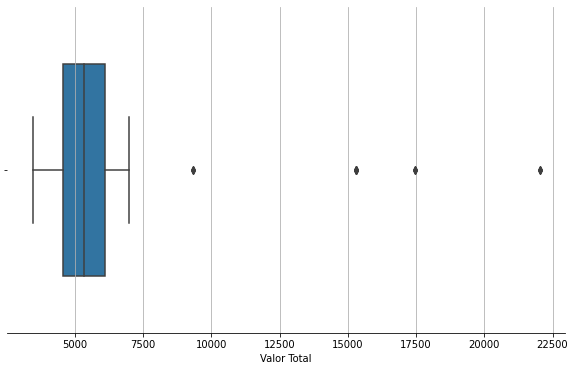

In [ ]:
# Distribuição por boxplot do valor TOTAL

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Valor Total', data= df, width= .65)
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

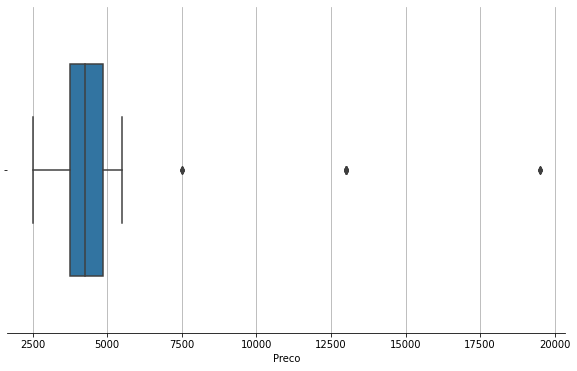

In [ ]:
# Distribuição por boxplot do valor do ALUGUEL

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Preco', data= df, width= .65)
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

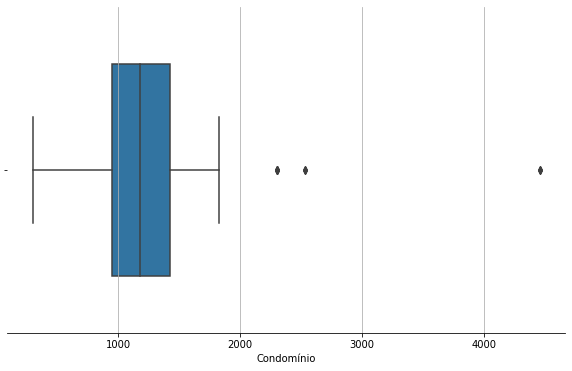

In [ ]:
# Distribuição por boxplot do valor do CONDO

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Condomínio', data= df, width= .65)
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

###Comparativo

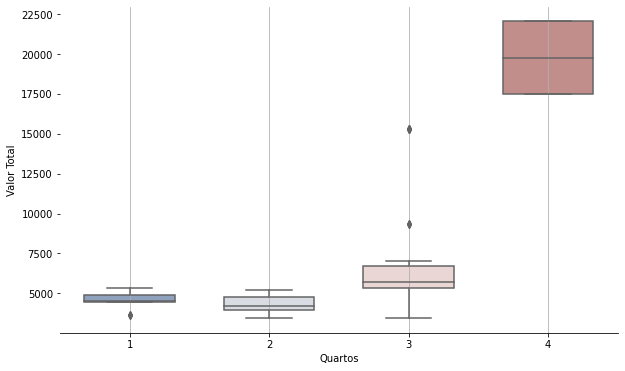

In [ ]:
# Plotando boxplots para avaliar distribuição por quartos TOTAL

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Quartos', y= 'Valor Total', data= df, width= .65, palette='vlag')
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)


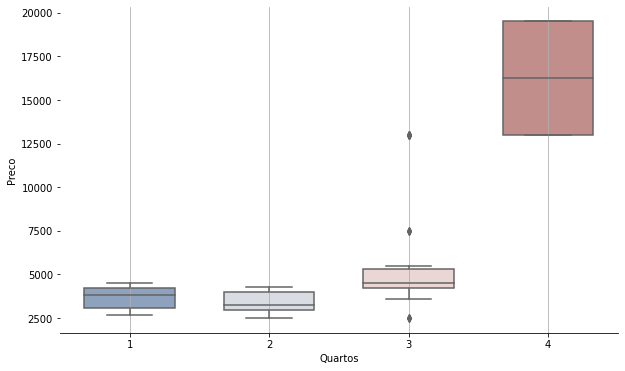

In [ ]:
# Plotando boxplots para avaliar distribuição por quartos ALUGUEL

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Quartos', y= 'Preco', data= df, width= .65, palette='vlag')
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

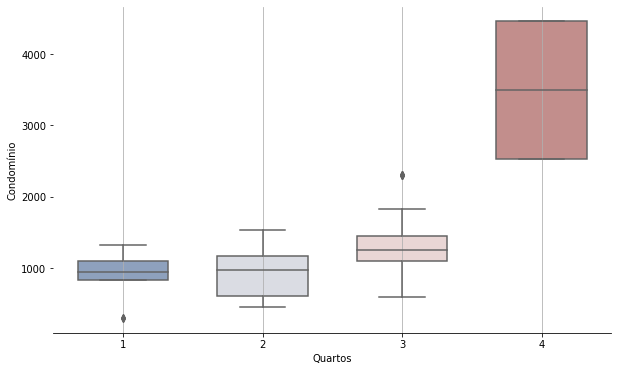

In [ ]:
# Plotando boxplots para avaliar distribuição por quartos CONDO

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Quartos', y= 'Condomínio', data= df, width= .65, palette='vlag')
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

### Apartamentos com 2 dormitórios

In [ ]:
y = [df[df['Quartos'] == 2]]
df2 = pd.DataFrame(y[0])

df2

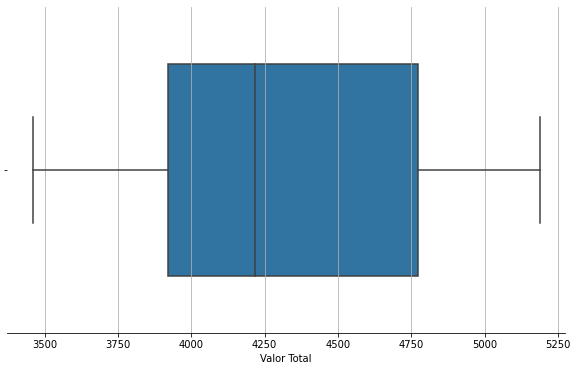

In [ ]:
#Segmentado por quantidade de quartos 2 TOTAL

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Valor Total', data= df2, width= .65)
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

In [ ]:
print(f" A média de valores para 2 quartos é: {df2['Valor Total'].mean()}")
print(f" A mediana de valores para 2 quartos é: {df2['Valor Total'].median()}")
print(f" O Valor máximo é: {df2['Valor Total'].max()}")
print(f" O Valor mínimo é: {df2['Valor Total'].min()}\n")

print(f" O total de imóveis com 2 quartos é: {len(df2['Valor Total'])}")

 A média de valores para 2 quartos é: 4317.75
 A mediana de valores para 2 quartos é: 4218.0
 O Valor máximo é: 5188.0
 O Valor mínimo é: 3459.0

 O total de imóveis com 2 quartos é: 24


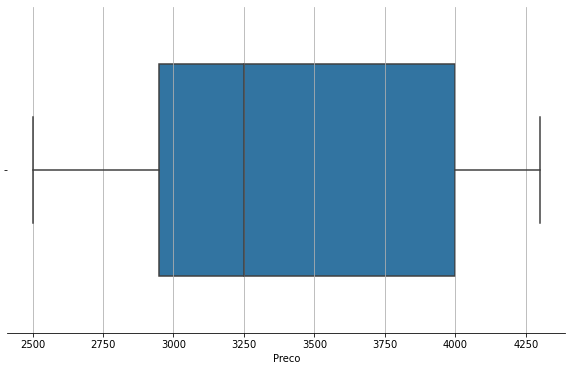

In [ ]:
#Segmentado por quantidade de quartos 2 ALUGUEL

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Preco', data= df2, width= .65)
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

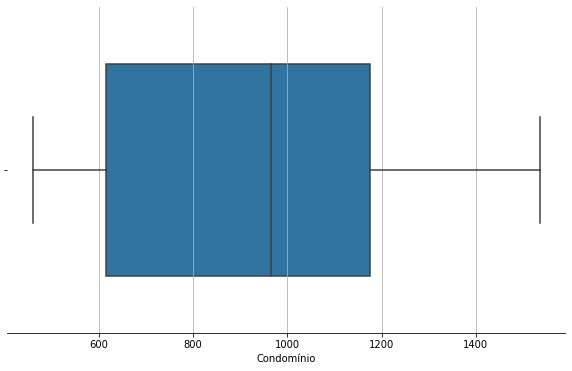

In [ ]:
#Segmentado por quantidade de quartos 2 CONDO

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Condomínio', data= df2, width= .65)
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

In [ ]:
print(f" A média de Aluguel para 2 quartos é: {df2['Preco'].mean()}")
print(f" A mediana de Aluguel para 2 quartos é: {df2['Preco'].median()}")
print(f" O Valor máximo é: {df2['Preco'].max()}")
print(f" O Valor mínimo é: {df2['Preco'].min()}\n")

print(f" A média de Condomínio para 2 quartos é: {df2['Condomínio'].mean()}")
print(f" A mediana de Condomínio para 2 quartos é: {df2['Condomínio'].median()}")
print(f" O Valor máximo é: {df2['Condomínio'].max()}")
print(f" O Valor mínimo é: {df2['Condomínio'].min()}\n")

 A média de Aluguel para 2 quartos é: 3387.5
 A mediana de Aluguel para 2 quartos é: 3250.0
 O Valor máximo é: 4300.0
 O Valor mínimo é: 2500.0

 A média de Condomínio para 2 quartos é: 930.25
 A mediana de Condomínio para 2 quartos é: 966.0
 O Valor máximo é: 1536.0
 O Valor mínimo é: 459.0



### Apartamentos com 3 dormitórios

In [ ]:
y = [df[df['Quartos'] == 3]]
df3 = pd.DataFrame(y[0])

df3

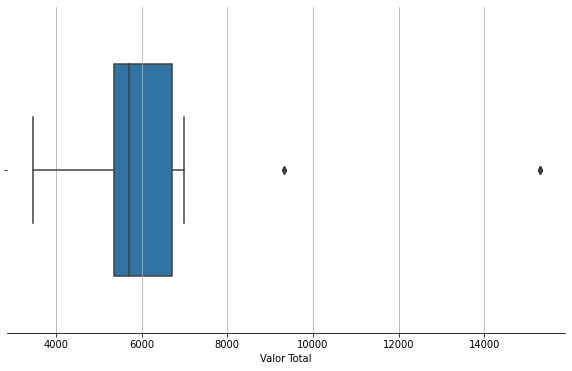

In [ ]:
#Segmentado por quantidade de quartos 3

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Valor Total', data= df3, width= .65)
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

In [ ]:
print(f" A média de valores para 3 quartos é: {df3['Valor Total'].mean()}")
print(f" A mediana de valores para 3 quartos é: {df3['Valor Total'].median()}")
print(f" O Valor máximo é: {df3['Valor Total'].max()}")
print(f" O Valor mínimo é: {df3['Valor Total'].min()}\n")

print(f" O total de imóveis com 3 quartos é: {len(df3['Valor Total'])}")

 A média de valores para 3 quartos é: 6731.523809523809
 A mediana de valores para 3 quartos é: 5716.0
 O Valor máximo é: 15300.0
 O Valor mínimo é: 3453.0

 O total de imóveis com 3 quartos é: 63


In [ ]:
print(f" A média de Aluguel para 3 quartos é: {df3['Preco'].mean()}")
print(f" A mediana de Aluguel para 3 quartos é: {df3['Preco'].median()}")
print(f" O Valor máximo é: {df3['Preco'].max()}")
print(f" O Valor mínimo é: {df3['Preco'].min()}\n")

print(f" A média de Condomínio para 3 quartos é: {df3['Condomínio'].mean()}")
print(f" A mediana de Condomínio para 3 quartos é: {df3['Condomínio'].median()}")
print(f" O Valor máximo é: {df3['Condomínio'].max()}")
print(f" O Valor mínimo é: {df3['Condomínio'].min()}\n")

 A média de Aluguel para 3 quartos é: 5398.412698412699
 A mediana de Aluguel para 3 quartos é: 4500.0
 O Valor máximo é: 13000.0
 O Valor mínimo é: 2500.0

 A média de Condomínio para 3 quartos é: 1333.111111111111
 A mediana de Condomínio para 3 quartos é: 1250.0
 O Valor máximo é: 2300.0
 O Valor mínimo é: 600.0



### Baixando dados de quinto andar